In [23]:
!pip install -r requirements.txt
import warnings
warnings.filterwarnings('ignore')
from pull_data import *
from train_model import *
from score_model import *
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

jupyter-console 6.0.0 has requirement prompt-toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.15 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
## This function will download and validate Titanic Test & train Data
## User May give username & password but this function works without username & password
## as Authentication is taken care by KAggle API. For more information refer to this function in pull_data.py
df_train, df_test = loadTitanic()

Titanic training file downloaded
Titanic test file downloaded
Function : downloadTitanic  || Seconds : 2.35 |  Minutes : 0.04
No. of records in training data : (891, 12)
No. of records in test data : (418, 11)
Function : loadTitanic  || Seconds : 2.36 |  Minutes : 0.04


In [25]:
##This func. will drop unwanted features like Name Ticket Cabin from training dataset
df=dropFeatures(df_train)

In [26]:
## This func. will list all the features with Missing Data. Once listed it will
# autmotaically try to fix the missing values. For coontinous values, mean is used
# and for categorical value mode is used to replace NaN/Null

df=fixMissingData(df)

Age : 177 | Missing data in % : 19.87
Missing Values in Age fixed.
Embarked : 2 | Missing data in % : 0.22
Missing Values in Embarked fixed.


In [27]:
## This func will automatically create the dummy variables for features. The user dies not have to mention the
# columns explicitly as the func. will find out what column needs dummy variables

df=createDummies(df)

Dummies created for : Pclass
Dummies created for : Sex
Dummies created for : SibSp
Dummies created for : Parch
Dummies created for : Embarked


In [28]:
## This func will automatically rescale continous variables that are not taken care by createDummies Func.
# No need to mention column names explicitly

df=rescaleFeatures(df)

Following Columns rescaled using MinMaxScaler : ['Age', 'Fare']


In [29]:
## This func will tune the hyperparameters for Random Forest Classifier. 
#GridSearchCV is used tuning Hyperparameters
tp = tuneHP(df)

Fitting 10 folds for each of 12000 candidates, totalling 120000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 1096 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 1512 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 2536 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 3144 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 3816 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 4552 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 5352 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6216 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 7144 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 8136 tasks      |

{'min_samples_leaf': 3, 'n_estimators': 20, 'criterion': 'entropy', 'max_depth': 17, 'max_features': 'sqrt'}
Function : tuneHP  || Seconds : 1643.26 |  Minutes : 27.39


Model Features downloaded
AUC & SD: 86.469% (3.562%)
Accuracy : 77.130%
Confusion Matrix :-
[[120  17]
 [ 34  52]]
Confusion matrix, without normalization
[[120  17]
 [ 34  52]]


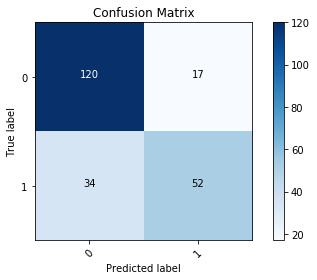

Model saved to local disk
Function : randomForestClassifier  || Seconds : 0.67 |  Minutes : 0.01


In [30]:
# This func will run the RandomForestClassifier Algorithm based on parameters provided by tuneHP Func
# It will plot Confusion Matrix  and will save the model
randomForestClassifier(df,tp['n_estimators'],tp['max_features'],tp['max_depth'],tp['min_samples_leaf'],tp['criterion'])

In [31]:
## This func will predict the target variable from test data. While doing so it will pre process the data, match
# the model features, load the model and will save the predictions in csv file
run_test_data(df_test)

Age : 86 | Missing data in % : 20.57
Missing Values in Age fixed.
Fare : 1 | Missing data in % : 0.24
Missing Values in Fare fixed.
Dummies created for : Pclass
Dummies created for : Sex
Dummies created for : SibSp
Dummies created for : Parch
Dummies created for : Embarked
Following Columns rescaled using MinMaxScaler : ['Age', 'Fare']
File kaggle_submission.csv saved to local directory
Function : run_test_data  || Seconds : 0.14 |  Minutes : 0.0
